In [9]:
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf


Step 1: Specigy date range for analysis

Here we begin by creating start and end dates using pythons datetime module.

In [10]:
end = dt.datetime.now()
start = dt.datetime(2000,1,1)
start, end
yf.pdr_override()


Step 2: Select the stocks/tickers you would like to analyse

Use the search bar in yahoo finance to work out other ticker structures

In [11]:
stockList = ['BBAS3', 'GGBR4', 'CSMG3', 'TAEE11', 'KLBN11']
stocks = [i + '.SA' for i in stockList]

stocks

['BBAS3.SA', 'GGBR4.SA', 'CSMG3.SA', 'TAEE11.SA', 'KLBN11.SA']

Step 3: Call the Pandas_Datareader Datareader module

Two ways of doing this:
    - pdr.DataReader(stocks, 'yahoo', start, end)
    - pdr.get_data_yahoo(stocks, start, end)

In [12]:
df = pdr.get_data_yahoo(stocks, start, end)
df.head()

[*********************100%%**********************]  5 of 5 completed


Price      Adj Close                                              Close  \
Ticker      BBAS3.SA CSMG3.SA    GGBR4.SA KLBN11.SA TAEE11.SA  BBAS3.SA   
Date                                                                      
2000-01-03  0.531419      NaN  190.370972       NaN       NaN  1.366666   
2000-01-04  0.506145      NaN  185.974808       NaN       NaN  1.301666   
2000-01-05  0.511329      NaN  192.333557       NaN       NaN  1.315000   
2000-01-06  0.518458      NaN  198.221313       NaN       NaN  1.333333   
2000-01-07  0.506793      NaN  207.249191       NaN       NaN  1.303333   

Price                                                ...      Open           \
Ticker     CSMG3.SA    GGBR4.SA KLBN11.SA TAEE11.SA  ...  BBAS3.SA CSMG3.SA   
Date                                                 ...                      
2000-01-03      NaN  485.000000       NaN       NaN  ...  1.400000      NaN   
2000-01-04      NaN  473.799988       NaN       NaN  ...  1.366666      NaN   
2000-01-05      NaN  490.000000       NaN       NaN  ...  1.300000      NaN   
2000-01-06      NaN  505.000000       NaN       NaN  ...  1.315000      NaN   
2000-01-07      NaN  528.000000       NaN       NaN  ...  1.333333      NaN   

Price                                     Volume                               \
Ticker     GGBR4.SA KLBN11.SA TAEE11.SA BBAS3.SA CSMG3.SA  GGBR4.SA KLBN11.SA   
Date                                                                            
2000-01-03    481.0       NaN       NaN  1029600      NaN   1210000       NaN   
2000-01-04    480.0       NaN       NaN   628200      NaN   8990000       NaN   
2000-01-05    470.0       NaN       NaN   957600      NaN   9920000       NaN   
2000-01-06    485.0       NaN       NaN   410400      NaN  12310000       NaN   
2000-01-07    510.0       NaN       NaN   788400      NaN  24570000       NaN   

Price                 
Ticker     TAEE11.SA  
Date                  
2000-01-03       NaN  
2000-01-04       NaN  
2000-01-05       NaN  
2000-01-06       NaN  
2000-01-07       NaN  

[5 rows x 30 columns]

Step 4: Access useful attributes easily

Lets assume we would like to use the close price information for all of these stocks. Then we will use this simply graph these price tracers

In [14]:
Close = df.Close
Close.head()

Ticker,BBAS3.SA,CSMG3.SA,GGBR4.SA,KLBN11.SA,TAEE11.SA
Date,,,,,
2000-01-03,1.366666,NaN,485.000000,NaN,NaN
2000-01-04,1.301666,NaN,473.799988,NaN,NaN
2000-01-05,1.315000,NaN,490.000000,NaN,NaN
2000-01-06,1.333333,NaN,505.000000,NaN,NaN
2000-01-07,1.303333,NaN,528.000000,NaN,NaN


In [24]:
Close[Close.index > end - dt.timedelta(days=365)].describe(percentiles=[0.1,0.5,0.9])

Ticker,BBAS3.SA,CSMG3.SA,GGBR4.SA,KLBN11.SA,TAEE11.SA
count,249.000000,249.000000,249.000000,249.000000,249.000000
mean,26.107068,19.801727,19.641994,20.590040,35.881245
std,2.080736,1.602995,1.688356,0.963641,1.170518
min,22.309999,15.880000,17.133333,18.763636,33.459999
10%,23.549999,17.334000,17.798333,19.420000,34.374000
50%,26.250000,20.200001,19.225000,20.518181,35.919998
90%,28.844000,21.629999,21.716667,21.878181,37.523999
max,29.799999,22.650000,24.375000,23.000000,38.380001


Step 5: Ploting with matplotlib vs plotly

<Axes: xlabel='Date'>

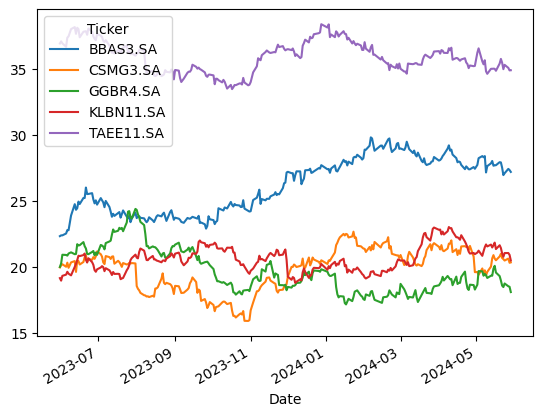

In [26]:
close_12_months = Close[Close.index > end - dt.timedelta(days=365)]
close_12_months.plot()